# Suzuki-Trotter Decomposition

## Imports

In [1]:
import math
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import linalg as la
import scipy as sp
from scipy import linalg as sla

## Outline

1. Abstract 
-  Motivation
    - Exponents of Operators
    - Time Evolution in Quantum Mechanics
    - Classical Computing
    - Quantum Computing
- Suzuki-Trotter Decomposition
    - STD Definition
    - STD Theorem
- Application: Time-Evolution
    - Time-Evolution Operator
    - Ising Model
    - Term Grouping
    - Verification of STD Theorem
- Error Analysis
    - Method
    - Plots
    - Analysis

## 1 | Abstract

$\hspace{5mm}$ We are going to verify the Suzuki-Trotter Decomposition Theorem. The Suzuki-Trotter Decomposition is necessary to execute certain algorithms on a quantum computer such as time evolution. Quantum computers will be able to allow time evolution simulations of larger quantum systems than can currently be done with clasical computers.

## 2 | Motivation

### Exponents of Operators

$\hspace{5mm}$ We all learn in high school that, given two (complex) numbers $A$ and $B$, the exponentiation of their sum is equal to the product of their exponentiation:

\begin{align}
\forall a,b &\in \mathbb{C}
\\
e^{a+b}&=e^ae^b
\end{align}

$\hspace{5mm}$ However, as with many aspects of life, things aren't as simple as we are lead to believe in our youth. In fact, if $A$ and $B$ are operators, then a stipulation must be added to our previous formula. That is:

\begin{align*}
\forall A,B &\in \mathbb{C}^{n\times n}
\\
e^{A+B}&=e^Ae^B \ \iff \ [A,B] = 0
\end{align*}

$\hspace{5mm}$ That begs the question, what if $A$ and $B$ don't commute? This situation occurs extremely frequenty in quantum mechanics.

### Time Evolution in Quantum Mechanics

$\hspace{5mm}$ One of the main programs of quantum mechanics is as follows: given an initial quantum state at time $t=0$, $\psi(0)$, of a quantum system described by the Hamiltonian $H$, what is the state at some latter time $t$, $\psi(t)$? The Shrodinger equation

\begin{align*}
i\partial_t|\psi(t)\rangle=H|\psi(t)\rangle
\end{align*}

with $\hbar=1$, gives us the answer

\begin{align*}
|\psi(t)\rangle = e^{-iHt}|\psi(0)\rangle
\end{align*}

after integration. 

$\hspace{5mm}$ Often, the Hamiltonian can be written as a sum of terms such as

\begin{align*}
H=\frac{p^2}{2m}+V(x)
\end{align*}

$\hspace{5mm}$ As discussed above, to simulate the time evolution of a quantum state of a quantum system described by this Hamiltonian, one must exponentiate the Hamiltonin. And if one wanted to decompose their exponentiation into the product of two simpler exponentials, one would run in to trouble - naemly the fact that, as every student of quantum mechanics knows, $[x,p]=i\neq0$. Therefore, as discussed above

\begin{align*}
U(t)=e^{-iHt}=\exp\left\{{-i\left(\frac{p^2}{2m}+V(x)\right)t}\right\}
\neq \exp\left\{-i\frac{p^2}{2m}t\right\}\exp\left\{-iV(x)t\right\}
\end{align*}

### Classical Computing

$\hspace{5mm}$ Now, you may be asking yourself, "why would I want to decompose my time-evolution operator into the product of simpler exponentials?" Because it makes time-evolution viable on a quantum computer. "A quantum computer?" - you protest - "What's wrong with a quantum computer?"

$\hspace{5mm}$ Well, because the Hilbert space of an $n$-body system is proportional to $2^n$. Therfore, the size of both a quantum state and the matrix representation of a Hamiltonian grows exponentially, as $2^n$ and $2^n\times2^n$, respectively. That means the classical computer must be able to store exponentially large amounts of data. Additionally, if one wants to simulate quantum time-evolution on a classical computer, one must exponentiate at $2^n\times2^n$ matrix. Since exponentiation involes costly matrix-matrix multiplication (which naively goes as $n^3$ for an $n\times n$ matrix) the complexity of the classical time evolution algorithm can quickly become entractable for quantum systems of interest (nuclei,molecules, etc.)

$\hspace{5mm}$ Quantum computers don't suffer from the same exponential growth because although the Hilbert space of a many-body system grows exponentially, so to does the Hilbert space of the quantum computer with the number of qubits it contains. Thus, one can store a wavefucntion of an $n$-body system with $\mathcal{O}(n)$ qubits instead of $\mathcal{O}(2^n)$ bits. One can simulate time evolution with less complexity as well. To understand this, and why the decomposition of the time-evolution operator is necessary for a quantum simulation of time-evolution, you need to know a little about how quantum computers work.

### Quantum Computing

$\hspace{5mm}$ Quantum computers store information in two-level quantum systems (e.g. the spin of electrons) called qubits. Qubits are represented as normalized complex-valued $2\times1$ vectors. A quantum algorithm is comprised of a series of quantum gates which act on the qubits in order to do a calculation with the information. Quantum gates are physical actions that are applied to the qubits (e.g. the application of an external electromagnetic field). A quantum gate that acts on $n$ qubits is represented as a unitary complex-valued $2^n\times2^n$ matrix. 

$\hspace{5mm}$ Therefore, we can write the time evolution operator matrix as a quantum gate. Applying this gate to a state qubits in an initial state will evolve them into the correct final state according to the time-evolution formula from above. The catch is that $n$-qubit gates (gates that act non-trivially on $n$ qubits) must be decomposed into sum universal set of one and two qubit gates (ust like classical gates are decomposed into some set of basic logic gates like NOT, AND, etc.) It has been proven that any two-qubit gate can be decomposed into at most 7 one-qubit gates and 3 two-qubit gates (10 gates). Furthermore, we know \textit{how} to decompose any two-qubit gates into 10 gates, not just that it can be done. We do \text{not} know the minimal decomposition of an aribitrary $n$-qubit gate (and perhaps never will). It has been proven that any $n$-qubit gate can be decomposed into the product of two-qubit gates (which we know how to decompose). However, the larger $n$ is, the more computational resources it can will take to do this composition.

$\hspace{5mm}$ Luckily, many physical Hamiltonians (especially in second quantization) are $k$-local, meaning that they can be written as the sum of $k$-qubit Hamiltonians. That is, a $k$-local Hamiltonian $H$ is able to be written as

\begin{align*}
H=\sum_{n=1}^mH_n
\end{align*}

for sum integer $m$, where, every $H_n$ is no more than a $k$-qubit unitary. Thus, the time evolution operator corresponding to a $k$-local Hamiltonian can be written as

\begin{align*}
U_H(t)=e^{\lambda\sum_{n=1}^mH_n}
\end{align*}

where $\lambda\equiv -it$. We can see the connection to our original motivation when we take into account that the terms $H_n$ often do not commute with one another. We are trying to take the exponential of a sum of non-commuting operators. This is just the repeated application of the case from the beginning, where $m$ was 2. Therefore, it's often true that

\begin{align*}
\exp\left(\sum_{n=1}^m\lambda H_n\right)
\neq
\prod_{n=1}^m\exp(\lambda H_n)
\end{align*}

$\hspace{5mm}$ Why do we want to be able to do this? Because for a $k$-local Hamiltonian of an $N$-body sytem, $k$ is often much less than $N$. Therefore, while the left-hand side of the above equation is $N$ (say $H$ describes an $N$-body system), the right-hand side is a product of $k$-body hamiltonians, each of which is easier to decompose into a product of two-qubit gates (since $k<<N$). So you see, while decomposing the left-hand side into basic quantum gates is computationally unpracticle for large $N$ (if not impossible), decomposing the right-hand side is doable.

$\hspace{5mm}$ Therefore, a decomposition that approximates the exponential of a sum as some product of exponentials makes time-evolution for many-body systems possible! One such decompositions is called the Susuki-Trotter Decomposition (STD).

## 3 | Susuki-Trotter Decomposition

### STD Definition

$\hspace{5mm}$ Consider an operator $H$ that can be written as a sum of $n$ terms

\begin{align*}
H=\sum_{k=1}^nH_k
\end{align*}

$\hspace{5mm}$ We wish to find an approximate decomposition of the exponentiation of $H$ 

\begin{align*}
U(\lambda)\equiv \exp\left(\lambda H\right)=\exp\left(\lambda\sum_{k=1}^nH_k\right)
\end{align*}

in terms of products of exponentials of the terms $H_k$. The Susuki-Trotter (ST) decomposition is such a decomposition and it is defined recuresively as follows: Denote the $i^{\text{th}}$ order Susuki-Trotter decomposition of $U(\lambda)$ as $S_i(\lambda)$. The base case is the second order decomposition:

\begin{align*}
S_2(\lambda)=\prod_{i=1}^n \exp\left(\frac{\lambda}{2}H_i\right)\prod_{j=n}^1\exp\left(\frac{\lambda}{2}H_j\right)
\end{align*}

and higher order Susuki-Trotter decompositions can be found recursively using

\begin{align*}
S_{2k}(\lambda)=\left[S_{2k-2}(P_k\lambda)\right]^2S_{2k-2}((1-4p_k)\lambda)\left[S_{2k-2}(P_k\lambda)\right]^2
\end{align*}

In [183]:
## Recursive function to return the j^th order ST decomposition

# Inputs: 
    # j: an integer (half the order of the desired ST decomposition)
    # l: a complex number (lambda)
    # H_list: a list of the complex valued square matrices (terms of the Hamiltonian)

# Outputs: 
    # j^th order ST decomposition
    
def S(K,l,H_list):
    
    # Get k from K=2k
    k = int(K/2)
    
    # Get n, the number of terms in the Hamiltonian
    n = len(H_list)
    
    # Get N, the size of the (NxN) Hamiltonian matrix
    N = len(H_list[0])
    
    # Base case
    if k == 1:
        
        # Initialize S_2(lamdba)
        S_2 = np.identity(N, dtype=complex)
        
        # First product
        for i in range(0,n):
            S_2 = S_2 @ sla.expm((l/2) * H_list[i])
            
        # Second product
        for i in range(0,n):
            S_2 = S_2 @ sla.expm((l/2) * H_list[(n-1)-i])
            
        return S_2
        
    # Recursive definition
    else:
        
        # Define S_2k
        S_2k = (S(2*k-2,p(k)*l,H_list))**2 * S(2*k-2,(1-4*p(k))*l,H_list) * (S(2*k-2,p(k)*l,H_list))**2
        
        # Return S_2k
        return S_2k

where

\begin{align*}
p_k=\frac{1}{4-4^{1/(2k-1)}}
\end{align*}

In [3]:
## Definition of p

# Inputs: 
    # k: an integer

# Outputs: 
    # Outputs p
    
def p(k):
    
    # Define p
    p = (4-4**(1/(2*k-1)))**(-1)
    
    # Return p
    return p

### STD Theorem:

$\hspace{5mm}$ Suzuki quantified the error associated with each order of decomposition by proving the following:

\begin{align*}
\left\Vert\exp{\left(\lambda\sum_{i=1}^n H_i\right)}-S_{2k}(\lambda)\right\Vert\in\mathcal{O}\left(|\lambda|^{2k+1}\right)
\end{align*}

$\hspace{5mm}$ We will refer to the norm in the STD theorem as the STD error norm.

In [4]:
## Function for Error Theorem

# Inputs: 
    # j: an integer (half the order of the desired ST decomposition)
    # l: a complex number (lambda)
    # H_list: a list of the complex valued square matrices (terms of the Hamiltonian)
    
# Outputs: 
    # STD error norm
    
def STD_norm(k,l,H_list):
    
    # Get n, the number of terms in the Hamiltonian
    n = len(H_list)
    
    # Get N, the size of the (NxN) Hamiltonian matrix
    N = len(H_list[0])
    
    # Initialize the Hamiltonian
    H = np.zeros((N,N), dtype=complex)
    
    # Define the Hamiltonian
    for i in range(n):
        H += H_list[i]
        
    # Define the norm
    norm = la.norm(sla.expm(l*H)-S(k,l,H_list))
    
    # Return the norm
    return norm

## 4 | Application: Time-Evolution

### Time-Evolution

Recall from before that a quantum state can be evolved through time using the time-evolution equation

\begin{align*}
|\psi(t)\rangle = e^{-iHt}|\psi(0)\rangle
\end{align*}

where, for a $k$-local Hamiltonian

\begin{align}
H = \sum_{i=1}^nh_{i}
\end{align}

the time-evolution operator $U(t)$ is

\begin{align}
U(t) = 
e^{-itH} = 
\exp{\left(-it\sum_{i=1}^nh_{i}\right)}
\end{align}

$\hspace{5mm}$ Note that this is becomes the quantity of interest in the STD theorem for $\lambda=-it$. Therefore, to decompose the time-evolution, we can use the STD theorem. We'll do this for the Ising Model Hamiltonian

### Ising Model

$\hspace{5mm}$ The Ising model represents a chain of electrons that each interact only with their neighbors. An external magnetic field is applied to the electrons. The model can be used to describe the phase transition of a magnet between ferromagnetic and anti-ferromagnetic states.

$\hspace{5mm}$ The Ising model Hamiltonian $H$ is defined as

\begin{align*}
H=-\sum_{i,j=1}^nJ_{ij}\sigma_i\cdot\sigma_j-\sum_{k=1}^nB_k\sigma_k
\end{align*}

where $J_{ij}\in\mathbb{R}$ are the interaction strengths, $B_k\in\mathbb{R}^3$ are the magnetic field strengths, and $\sigma_i$ are vectors of Pauli spin matrices.

$\hspace{5mm}$ To simulate the time-evolution of the Ising model on quantum computer we use one qubit to represent the state of one electron. The Hamiltonian is 2-local because it is written as a sum of Hamiltonians, each of which act non-trivially on at most 2 qubits (electrons) at a time. 

$\hspace{5mm}$ Before exponentiate the Hamiltonian for time evolution, we're going to write it as a single sum to reduce the number of terms by a factor of two from $n^2+n$ to $n \choose 2$:

\begin{align}
H=\sum_{i<j=1}^nh_{ij}
\end{align} 

where we've defined

\begin{align}
h_{ij}\equiv -J_{ij}\sigma_i\cdot\sigma_j-\frac{1}{n-1}\left(B_{i}\cdot\sigma_i+B_{j}\cdot\sigma_j\right)
\end{align}

In [5]:
## Function to create the term h_ij

# Inputs: 
    # n: an integer (the number of electrons)
    # J: an integer valued matrix of the interactiong strenghts J_ij
    # B: a list of integer-valued vectors of the the magnetic field strengths B_k  
    # i: an integer (the first intex of h_ij)
    # j: an integer (the second intex of h_ij)
    
# Outputs: 
    # The term square complex valued matrix h_ij

def h_ij(i,j,n,J,B):
    
    # Initialize the Hamiltonian
    H = np.zeros((2**n,2**n),dtype=complex)

    # Create the Hamiltonian
    for k in range(3): # Sum over the 3 Pauli matrices

        # Add the k^th component of each term of h_ij
        H += -(B[i][k] * sigma(i,k,n) - B[j][k] * sigma(j,k,n))/(n-1) - J[i][j] * (sigma(i,k,n) @ sigma(j,k,n))
    
    # Return the Hamiltonian
    return H

$\hspace{5mm}$ To write each term $h_{ij}$ in matrix form, let me explain the notation used in the Hamiltonian. The terms $\sigma_i$ are defined as

\begin{align}
\sigma_i\equiv(\sigma^1_i,\sigma^2_i,\sigma^3_i)
\end{align}

$\hspace{5mm}$ where

\begin{align}
\sigma^p_k\equiv \left(\bigotimes_{i=1}^{k-1}\sigma^0\right)\sigma^p\left(\bigotimes_{i=k+1}^{n}\sigma^0\right)
\end{align}

$\hspace{5mm}$ for $p=1,2,3$ and the dot product of two pauli vectors is defined as

\begin{align}
\sigma_i\cdot\sigma_j = \sum_{k=1}^3\sigma^k_i\otimes\sigma^k_j
\end{align}

$\hspace{5mm}$ and

\begin{align}
\sigma^0 =
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
, \quad
\sigma^1 =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
, \quad
\sigma^2 =
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
, \quad
\sigma^3 =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\end{align}

$\hspace{5mm}$ are the Pauli spin matrices.

In [6]:
## Function to output the k^th Pauli spin matrix

# Inputs: 
    # p: an integer (the index of the Pauli spin matrix)
    # k: an integer (the site of the non-trivial matrix)
    # n: an integer (the numeber of sites)

# Outputs: 
    # The p^th Pauli spin matrix at the k^th site

def sigma(p,k,n):
    
    # List of labels of Pauli spin matrices
    p_label_list = [0]*n
    
    # Set the kth site to be the p^th Pauli spin matrix
    p_label_list[k] = p
    
    # List of Pauli matrices to take the tesnor product of
    p_list = []
    
    # Fill p_list
    for i in range(n):
    
        if p_label_list[i] == 0: # Return the 0^th Pauli matrix
            p_list.append(np.array([[1,0],
                                    [0,1]], dtype = complex))

        elif p_label_list[i] == 1: # Return the 1^st Pauli matrix
            p_list.append(np.array([[0,1],
                                    [1,0]], dtype = complex))

        elif p_label_list[i] == 2: # Return the 2^nd Pauli matrix
            p_list.append(np.array([[0,-1j],
                                    [1j,0]], dtype = complex))

        elif p_label_list[i] == 3: # Return the 3^rd Pauli matrix
            p_list.append(np.array([[1,0],
                                    [0,-1]], dtype = complex))

        else:
            print("k must be 0, 1, 2, or 3")
            
    # Tensor product the entries of p_list
    sigma = p_list[0]
    for i in range(1,n):
        sigma = np.kron(sigma,p_list[i])

    # Return the p^th Pauli spin matrix at the k^th site
    return sigma

### Term Grouping

$\hspace{5mm}$ Bcause $\exp(A+B)=\exp(A)\exp(B)$ if $A$ and $B$ commute, we can reduce the number of non-commuting groups of terms by putting them into groups such that every term in the group commutes with every other term in the group. First thing to notice is that each $h_{ij}$ consists of nine terms. This can be seen by expanding out the dot products using the notation above:

\begin{align*}
h_{ij}
&\equiv 
-J_{ij}\sigma_i\cdot\sigma_j-\frac{1}{n-1}\left(B_{i}\cdot\sigma_i+B_{j}\cdot\sigma_j\right)
\\
&=
-J_{ij}\left(\sigma_i^x\sigma_j^x+\sigma_i^y\sigma_j^y+\sigma_i^z\sigma_j^z\right)
-\frac{1}{n-1}\left(B_{i}^x\sigma^x_i+B_{i}^y\sigma^y_i+B_{i}^z\sigma^z_i
+B_{j}^x\sigma^x_j+B_{j}^y\sigma^y_j+B_{j}^z\sigma^z_j\right)
\end{align*}

$\hspace{5mm}$ Now, while some terms commute: $[\sigma_i^\alpha\sigma_j^\alpha,\sigma_i^\beta\sigma_j^\beta]=0$ for $\alpha,\beta=x,y,z$ and $[B_{i}\cdot\sigma_i,B_{j}\cdot\sigma_j]$ (since $i\neq j$), others don't: $[\sigma_i\cdot\sigma_j,B_{k}\cdot\sigma_k]\neq0$ for $k=i,j$. Thus, if we wanted to write the exponentiation of a term $h_{ij}$ as a product of exponentiations of it's terms, we would need to use the ST decomposition. However, for applications to quantum computing, we don't need to do this. That's because, as previously mentioned, we know how to decompose an arbitrary two-qubit matrix into an optimal set of gates. That is, each term $h_{ij}$ can be efficiently decomposed into basic quantum gates and so we don't have to TS decompose any term $h_{ij}$

$\hspace{5mm}$ However, the terms $h_{ij}$ do not all commute amongst themselves. We will now show that, if $n$ is even, we can reduce our Hamiltonian to the sum of two groups and, if $n$ is odd, three groups.

$\hspace{5mm}$ Let $Q_{ij}$ be the set of qubits that the term $h_{ij}$ acts on non-trivially. Note that, if $Q_{ij}$ and $Q_{kl}$ are disjoint, then $[h_{ij},h_{kl}]=0$ (because $[\sigma^0,\sigma^k]=0$ for $k=1,2,3$). Thus, we want to group the terms $h_{ij}$ such that the sets $Q_{ij}$ of the terms in the group are all disjoint from one another. We can partition the terms $h_{ij}$ into two groups at minimum:

\begin{align*}
G_1 &= \{h_{2i-1,2i} : i = 1,2,...\} = \{h_{1,2},h_{3,4},...\}
\\
G_2 &= \{h_{2i,2i+1} : i = 1,2,...\} = \{h_{2,3},h_{4,5},...\}
\end{align*}

We can now write our Hamiltonian as the sum of just two terms

\begin{align*}
H = G_1 + G_2
\end{align*}

In [98]:
## Function to split the terms h_ij into two groups

# Inputs: 
    # n: an integer (the number of electrons)
    # J: an integer valued matrix of the interactiong strenghts J_ij
    # B: a list of integer-valued vectors of the the magnetic field strengths B_k  

# Outputs: 
    # List of groups G1 and G2 of terms h_ij

def groups(n,J,B):
    
    # Initialize groups G1 and G2
    G1 = np.zeros((2**n,2**n), dtype=complex)
    G2 = np.zeros((2**n,2**n), dtype=complex)

    # Create G1
    i = 0
    while 2*i+1 <= n:
 
        # Add to G1
        G1 += h_ij(2*i,2*i+1,n,J,B)
    
        # Update i
        i += 1
     
    # Create G2
    j = 0
    while 2*j+3 <= n:
        
        # Add to G2
        G2 += h_ij(2*j+2,2*j+3,n,J,B)
        
        # Update j
        j +=1
        
    # Return the the groups as a list
    return [G1, G2]

### Verification of STD Theorem

$\hspace{5mm}$ To verify the STD theorem we'll use the STD definition to decompose the Ising model's time-evolution operator. We'll then calculate the STD norm for various order decompositions and verify that they scale as predicted in the STD theorem.

We'll now choose specific variables for the Ising model Hamiltonian, it's time evolution operator. Additionally, we'll define variables to compute the STD norm for various and orders of decomposition $K=2k$ for $k=1,...,k_\text{max}$ and discrete times on the interval $[t_\text{min},t_\text{max}]$:

In [185]:
## Variables for Ising model Hamiltonian

# Number of sites
n = 4

# Matrix of interaction strengths
# where each entry is chosen from the uniform random distrbution of the interval [0,1]
J = np.random.rand(n,n) # 

# Matrix of external magnetic field strength vectors
# where each entry is chosen from the uniform random distrbution of the interval [-1,1]
B = np.random.rand(n,3)
for i in range(n):
    for j in range(3):
        B[i][j] = 2*B[i][j] - 1

# List of times
t_min = 10**(-4)
t_max = 100*t_min # Maximum time
n_t = 20 # Number of points in time
t_list = np.linspace(t_min,t_max,n_t)

# List of orders
k_max = 4 # Maximum order
K_list = []
for k in range(1,k_max+1):
    K_list.append(2*k)

Finally, we'll compute the STD norm for the chosen orders of decomposition over the chosen points of time.

In [192]:
# List of terms in Hamiltonian
H_list = groups(n,J,B)

# List of norms
norm_list = []

# Loop through orders of decomposition
for K in K_list:
    norm_list_K = []
    for t in t_list:
        l = -1j*t # lambda
        norm_list_K.append(STD_norm(K,l,H_list))
    norm_list.append(norm_list_K)

## 5 | Error Analysis

## Method

$\hspace{5mm}$ We will be fitting the data 

\begin{align*}
(f(x),x)=
(\ln\text{N(2k)},\ln|\lambda|)
\end{align*}

to a line $f(x)=mx+b$. Here, N(2k) is the STD norm using the $2k^{\text{th}}$ order STD decomposition. The slope of that line should return $2k+1$ for order $2k$. We can see this by taking the logarithm of both sides of the STD theorem:

\begin{align*}
N(2k) &= |\lambda|^{2k+1}
\\
\Rightarrow \
\ln{N(2k)} &= (2k+1)\ln|\lambda|
\end{align*}

## Plots

We will now make a plot of the STD norm versus $|\lambda|$ (which is just $t$ in our case) for various orders $k$:

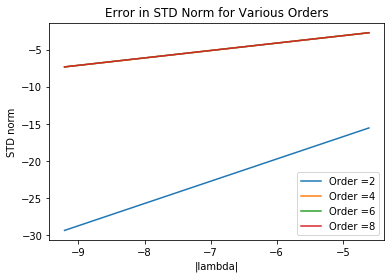

In [193]:
# Plotting STD norm versus abs(lambda)

# Convert lists to do a log-log plot
log_t_list = []
for t in t_list:
    log_t_list.append(np.log(t))

log_norm_list = []
for K in range(len(K_list)):
    log_norm_list_K = []
    for t in range(len(t_list)):
        log_norm_list_K.append(np.log(norm_list[K][t]))
    log_norm_list.append(log_norm_list_K)
    
# List for slopes
slopes = []
# Loop over orders of decomposition
for K in range(len(K_list)):
    slopes.append(np.polyfit(log_t_list,log_norm_list[K],1)[0])
    plt.plot(log_t_list,log_norm_list[K],label="Order =" + str(K_list[K]))
    plt.title("Error in STD Norm for Various Orders")
    plt.xlabel("|lambda|")
    plt.ylabel("STD norm")
    plt.legend()
    
plt.show()

## Analysis

We will now find fit a line to each set of data points. Recall that, since it is a log-log plot, the slope for order $K$ should be $K+1$ according to the STD theorem. Below, we print the order, expected slope (ES), the computed slope (CS), and the relative error (RE) between ES and CS.

In [220]:
print('K',"ES", "CS", " RE")
for k in range(len(K_list)):
    K = K_list[k]
    ES = K_list[k]+1
    CS = np.polyfit(log_t_list,log_norm_list[k],1)[0]
    CS_rounded = round(np.polyfit(log_t_list,log_norm_list[k],1)[0],4)
    RE = round(abs(ES-CS)/abs(ES),8)
    print(K, ES,"",CS_rounded,RE)

K ES CS  RE
2 3  3.0 7.04e-06
4 5  1.0 0.79999981
6 7  1.0 0.85714272
8 9  1.0 0.88888869


As we can see, the calculated slope is very close to the expected slope from the STD theorem. We have verified computationally (at least up to K_max) the correctness of the STD Theorem.